<a href="https://colab.research.google.com/github/marcoosnt1/Portifolio_Data_Science/blob/main/Projeto_spotify_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Introdução

O spotify atualmente é um dos maiores serviços de streaming de audio existente no mercado, ele esta disponivel em boa parte dos paises do mundo e em diversas plataformas digitais.
O objetivo da plataforma, é unir produtores a consumidores de musicas e podcasts, democratizando o acesso a cultura e dando mais espaços a artistas e produtores independentes. No final do ano de 2019, o spotify ja contava com cerca de  250 milhões de usuarios. 

Por ser uma plataforma de streaming digital o spotify gera diariamente uma quantidade imensa de dados, e faz um bom uso  deles através de sistemas de recomendação.

O objetivo deste projeto é utilizar dos dados disponiveis pela plataforma, e trabalhar sistemas de recomendação, desenvolvendo assim um modelo de clustering.Neste projeto utilizaremos um dos modelos existentes no mercado mais utilizado para esse tipo de tarefa, o k-means.

### 2.Importando bibliotecas e analise exploratória dos dados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

import warnings 
%matplotlib inline 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/df_spotify.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       300 non-null    object 
 1   track_name        300 non-null    object 
 2   track_id          300 non-null    object 
 3   popularity        300 non-null    int64  
 4   danceability      300 non-null    float64
 5   energy            300 non-null    float64
 6   key               300 non-null    int64  
 7   loudness          300 non-null    float64
 8   mode              300 non-null    int64  
 9   speechiness       300 non-null    float64
 10  acousticness      300 non-null    float64
 11  instrumentalness  300 non-null    float64
 12  liveness          300 non-null    float64
 13  valence           300 non-null    float64
 14  tempo             300 non-null    float64
 15  duration_ms       300 non-null    int64  
 16  time_signature    300 non-null    int64  
dt

In [ ]:
df.shape

(300, 17)

In [ ]:
df.isnull().sum()

artist_name         0
track_name          0
track_id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,72.593333,0.687493,0.690387,5.416667,-5.590880,0.580000,0.130343,0.366675,0.007022,0.348395,0.624141,128.108953,187367.970000,3.993333
std,15.518291,0.131100,0.179981,3.733119,2.812709,0.494383,0.127546,0.247943,0.060881,0.310920,0.216386,25.543347,52572.133558,0.356435
min,0.000000,0.265000,0.111000,0.000000,-15.811000,0.000000,0.027700,0.002160,0.000000,0.019700,0.060500,69.047000,113000.000000,1.000000
25%,69.000000,0.600500,0.564750,2.000000,-6.847500,0.000000,0.046500,0.158750,0.000000,0.102750,0.498000,108.733000,159489.000000,4.000000
50%,73.000000,0.693500,0.716500,6.000000,-5.261000,1.000000,0.077650,0.339000,0.000000,0.198500,0.656500,128.521000,179082.500000,4.000000
75%,79.000000,0.783000,0.833500,9.000000,-3.603250,1.000000,0.166250,0.523250,0.000004,0.609750,0.790000,148.496250,203776.250000,4.000000
max,100.000000,0.957000,0.977000,11.000000,0.302000,1.000000,0.841000,0.978000,0.747000,0.983000,0.969000,192.091000,572039.000000,5.000000


In [ ]:
df[df.energy == np.max(df.energy)]
#checkando a musica com maior energia 

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
149,Gloria Groove,MIL GRAU,4BkjISAYyQ6OMnEpzpQxgA,72,0.822,0.977,10,-1.431,0,0.0509,0.462,0.000001,0.0489,0.824,97.094,145979,4


In [ ]:
df[df.danceability == np.max(df.danceability)]
#musica com maior danceability

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
281,Dj Henrique de ferraz,Eu Já Catuquei,42t6dJM0L2svh709ksEuhn,68,0.957,0.704,0,-3.467,0,0.463,0.667,0.0025,0.0428,0.39,130.006,158976,4


In [ ]:
df[df.duration_ms	 == np.max(df.duration_ms)]
#musica com maior duração

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
76,Pineapple StormTv,Poesia Acústica #7: Céu Azul,2FGhB10Gon36GgFcOTMQEW,76,0.795,0.697,9,-4.276,0,0.31,0.0873,0.0,0.0997,0.542,102.756,572039,4


In [ ]:
df[df.popularity == np.max(df.popularity)]
#musica mais popular.

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
112,Maroon 5,Memories,2b8fOow8UzyDFAE27YhOZM,100,0.764,0.32,11,-7.209,1,0.0546,0.837,0.0,0.0822,0.575,91.019,189486,4


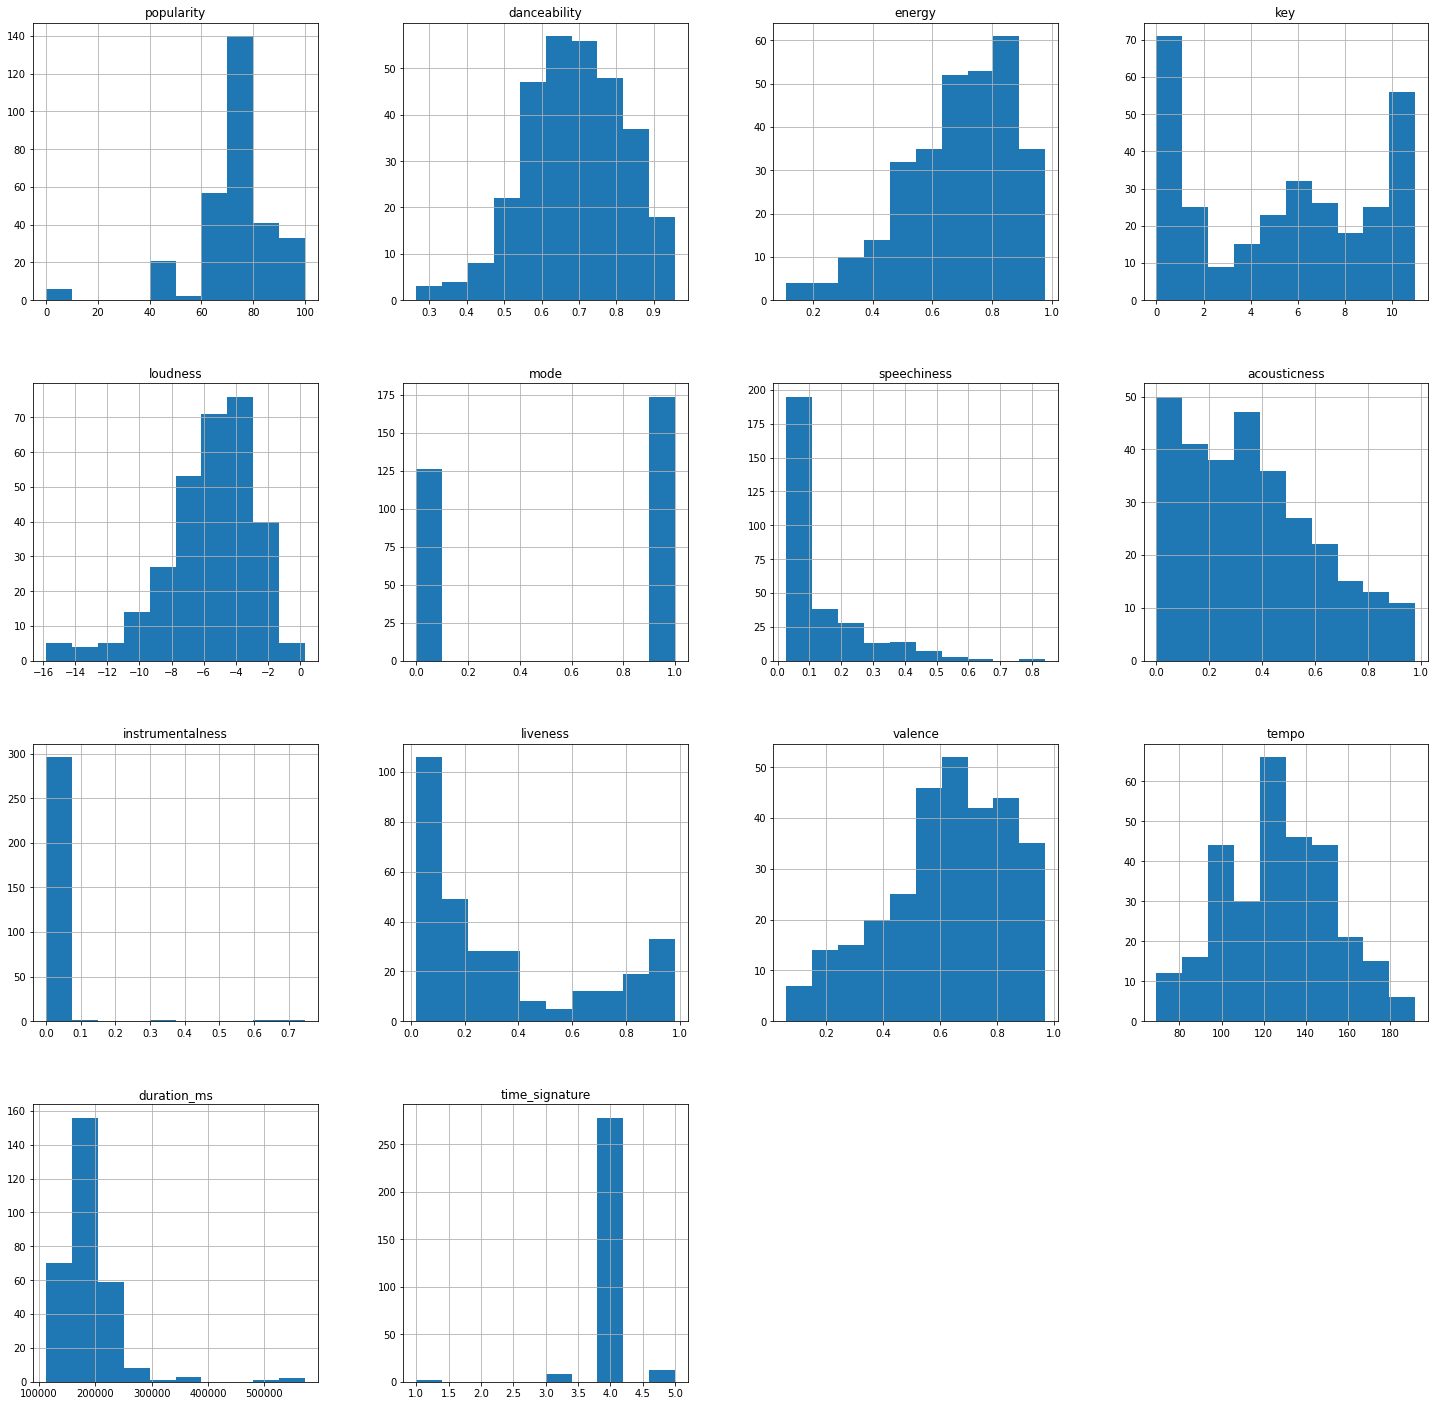

In [ ]:
df.hist(figsize=(25,25));
#plotando o histograma de todos os features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

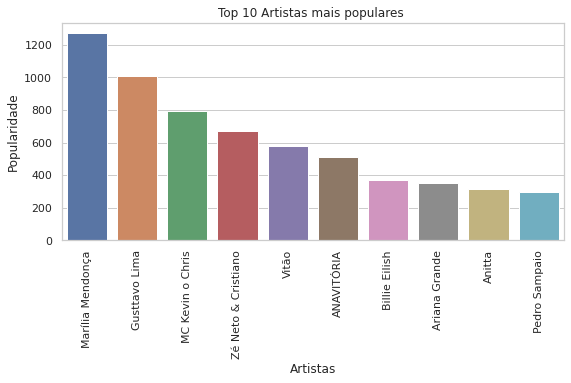

In [ ]:
#artistas mais populares
plt.figure(figsize=(9, 4))
sns.set(style="whitegrid")
x = df.groupby("artist_name")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top 10 Artistas mais populares ')
ax.set_ylabel('Popularidade')
ax.set_xlabel('Artistas')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

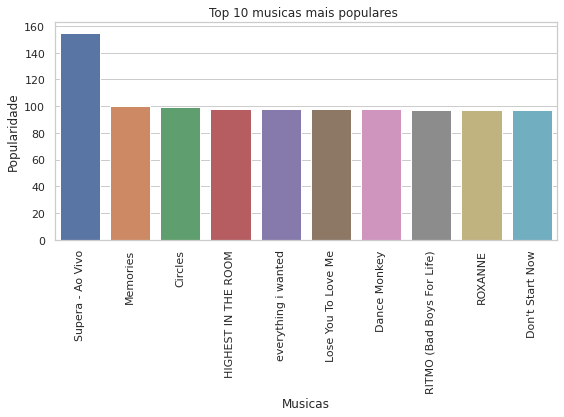

In [ ]:
#musicas mais populares
plt.figure(figsize=(9, 4))
sns.set(style="whitegrid")
x = df.groupby("track_name")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top 10 musicas mais populares ')
ax.set_ylabel('Popularidade')
ax.set_xlabel('Musicas')
plt.xticks(rotation = 90)

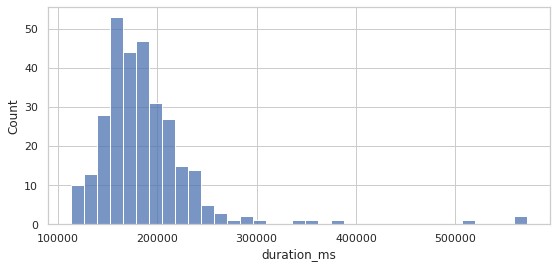

In [ ]:
plt.figure(figsize=(9, 4))
sns.histplot(df.duration_ms)
#tempo em ms das musicas  

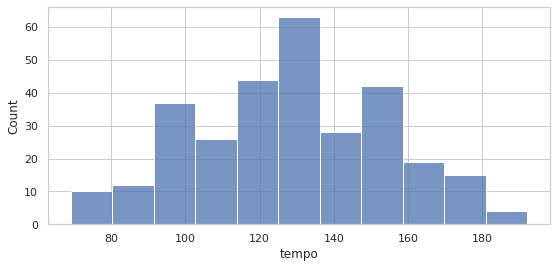

In [ ]:
plt.figure(figsize=(9, 4))
sns.histplot(df.tempo)
#bpm medio das musicas 

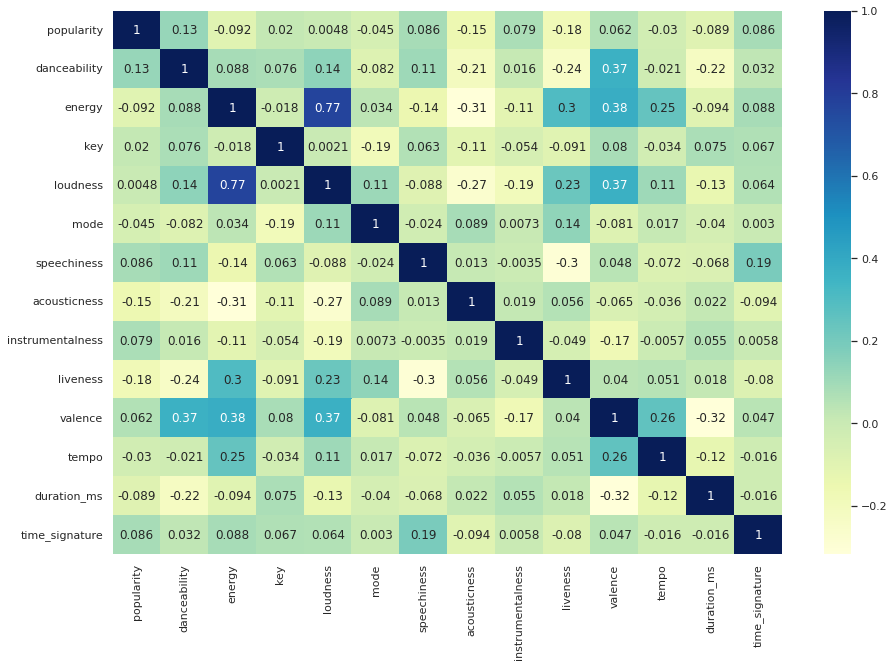

In [ ]:
#checando correlação entre variaveis.
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 3.Pré processamento dos dados 

In [ ]:
#criando um novo dataframe apenas com features numericas.
df2 = pd.DataFrame(df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values)

#pegando o  nome das colunas
cols = df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].columns

In [ ]:
# transformando o dados para a mesma escala

#aplicando o min max scaler 
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df2))
scaled.columns = cols

scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.86,0.819364,0.506928,0.454545,0.545212,0.0,0.038116,0.252951,0.000011,0.168483,0.903137,0.690948,0.086668,0.75
1,0.85,0.578035,0.729792,0.363636,0.706076,1.0,0.035657,0.059682,0.000000,0.975086,0.657677,0.508160,0.075697,0.75
2,0.85,0.660405,0.841801,0.909091,0.780177,0.0,0.062462,0.428185,0.000000,0.095816,0.870116,0.658797,0.161742,0.75
3,0.84,0.553468,0.789838,0.000000,0.637684,0.0,0.174966,0.074438,0.000000,0.374027,0.591635,0.902084,0.178135,0.75
4,0.84,0.380058,0.876443,1.000000,0.787439,1.0,0.070577,0.243728,0.000000,0.325236,0.719318,0.677181,0.150162,0.75


**Procurando o numero de clusters necessario**

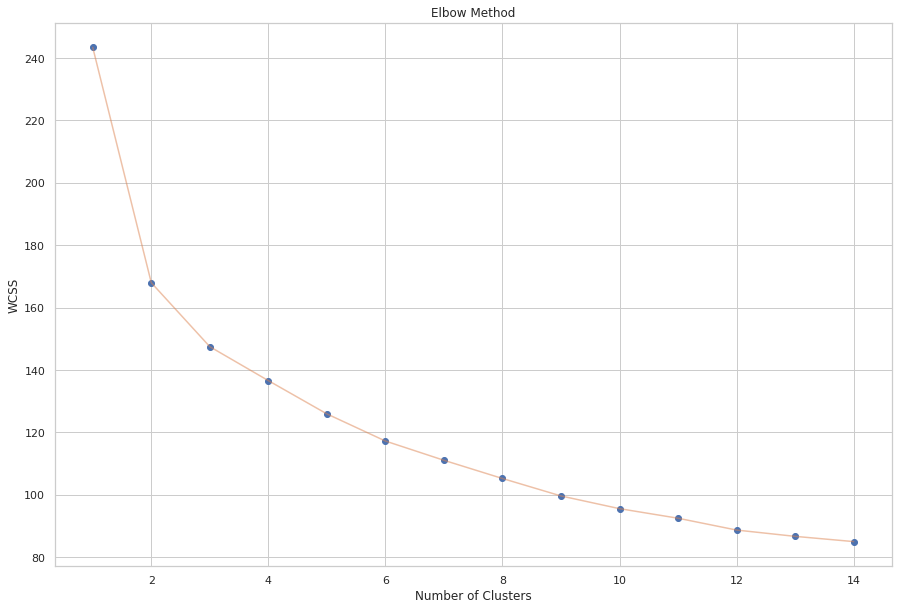

In [ ]:
wcss = []
for i in range(1,15):
    #instanciando o modelo
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    #fitando os daados normalizados
    kmeans.fit(scaled)
    #salvando os resultados em uma lista
    wcss.append(kmeans.inertia_)


#plotando o elbow method

plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()



In [ ]:
#verificando os resultados 
print('Lista com os erros', wcss)

Lista com os erros [243.41045994827238, 168.01043365483952, 147.5040317325812, 136.62322505675823, 125.96295704040412, 117.26483036925296, 111.09150666430298, 105.25825515352483, 99.66442075003897, 95.59211087511277, 92.52623330897842, 88.73497072227917, 86.71495562578684, 85.03921117378374]


In [ ]:
dif = np.diff(wcss)
print('Diferença entre os elementos do cluster',dif)

Diferença entre os elementos do cluster [-75.40002629 -20.50640192 -10.88080668 -10.66026802  -8.69812667
  -6.1733237   -5.83325151  -5.5938344   -4.07230987  -3.06587757
  -3.79126259  -2.0200151   -1.67574445]


Escolhemos o numero de cluster ideal, apartir do momento em que os valores começam a se estabilizar e não caem de maneira brusca.A partir dos resultados dos dados e da lista, podemos notar que esses numero começa a partir do  sexto resultado.

### 4.Treinando o modelo 

In [ ]:
#instanciando o modelo
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

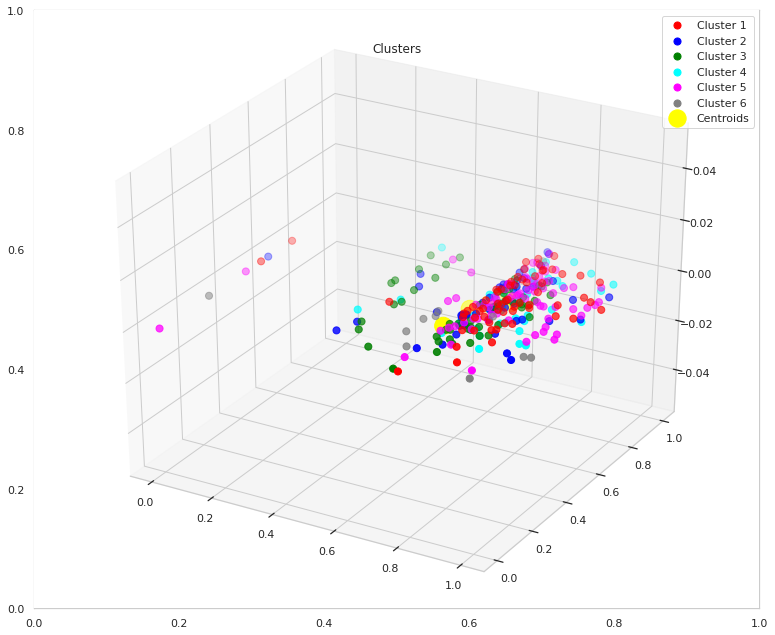

In [ ]:
fig, ax = plt.subplots(figsize=(13,11))
scaled = scaler.fit_transform(df2)
# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')
# plotando os clusters
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [ ]:
#visualizando as previsões
y_kmeans

array([4, 2, 4, 1, 0, 4, 0, 1, 3, 3, 2, 4, 1, 0, 0, 0, 3, 4, 2, 2, 0, 0,
       0, 2, 4, 3, 2, 2, 3, 3, 2, 2, 0, 0, 1, 2, 3, 0, 0, 0, 2, 4, 2, 4,
       3, 2, 3, 0, 4, 2, 2, 3, 0, 0, 0, 3, 4, 3, 4, 4, 4, 4, 2, 1, 2, 1,
       4, 3, 1, 1, 3, 1, 5, 0, 5, 2, 4, 3, 4, 4, 1, 3, 0, 4, 2, 2, 0, 0,
       0, 4, 4, 3, 4, 2, 4, 4, 4, 2, 1, 4, 4, 0, 4, 0, 3, 2, 0, 3, 5, 2,
       2, 4, 0, 3, 4, 2, 4, 0, 1, 1, 0, 3, 1, 4, 0, 2, 0, 1, 1, 0, 2, 1,
       0, 3, 0, 4, 1, 1, 1, 4, 1, 4, 4, 4, 4, 3, 2, 4, 4, 4, 1, 3, 1, 1,
       0, 4, 3, 2, 3, 2, 1, 4, 3, 2, 2, 3, 2, 0, 4, 0, 1, 4, 2, 3, 0, 2,
       2, 3, 2, 3, 1, 2, 0, 0, 3, 1, 0, 4, 0, 4, 4, 2, 0, 0, 1, 3, 4, 2,
       3, 2, 0, 4, 4, 3, 0, 4, 5, 3, 2, 3, 2, 1, 2, 2, 4, 2, 0, 1, 0, 2,
       2, 4, 4, 4, 4, 1, 1, 2, 4, 1, 5, 0, 1, 3, 0, 2, 3, 1, 4, 0, 4, 0,
       3, 0, 1, 0, 3, 1, 4, 1, 4, 0, 0, 2, 2, 4, 1, 4, 1, 0, 4, 2, 0, 3,
       1, 4, 1, 0, 1, 1, 0, 5, 4, 3, 3, 4, 4, 3, 0, 4, 3, 1, 1, 5, 1, 4,
       4, 4, 4, 0, 1, 5, 5, 0, 4, 1, 1, 5, 5, 0], d

In [ ]:
# convertendo as previsões para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um df
print(kmeans.shape)
kmeans.head()

(300, 1)


,cluster
0,4
1,2
2,4
3,1
4,0


In [ ]:
# concatenando os clusters 
df = pd.concat([df, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4,2
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4,1
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4,0


In [ ]:
# conferindo o número de músicas por cluster
df['cluster'].value_counts()

4    75
0    63
2    54
1    51
3    46
5    11
Name: cluster, dtype: int64

In [ ]:
#conferindo  a  distribuição estatistica dos dados em cada coluna.
df.groupby(df.cluster).describe()

popularity                                                        \
             count       mean        std   min    25%   50%   75%    max   
cluster                                                                    
0             63.0  73.396825  15.902464   0.0  69.50  74.0  79.5  100.0   
1             51.0  71.000000  15.340143   0.0  68.50  71.0  76.0   98.0   
2             54.0  67.888889  13.108641  40.0  68.25  72.5  77.0   85.0   
3             46.0  76.086957  11.814917  40.0  71.00  76.0  83.0   99.0   
4             75.0  75.053333  16.184655   0.0  70.00  75.0  83.5   98.0   
5             11.0  67.090909  26.594941   0.0  60.50  65.0  83.0   98.0   

        danceability            ... duration_ms           time_signature  \
               count      mean  ...         75%       max          count   
cluster                         ...                                        
0               63.0  0.713190  ...   196114.50  562388.0           63.0   
1               51.0  0.678039  ...   212251.50  253333.0           51.0   
2               54.0  0.640833  ...   196552.25  257954.0           54.0   
3               46.0  0.706304  ...   194589.25  293593.0           46.0   
4               75.0  0.715000  ...   207152.00  572039.0           75.0   
5               11.0  0.547000  ...   213424.00  245539.0           11.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        4.031746  0.357782  3.0  4.0  4.0  4.0  5.0  
1        4.000000  0.529150  1.0  4.0  4.0  4.0  5.0  
2        4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
3        3.978261  0.147442  3.0  4.0  4.0  4.0  4.0  
4        3.986667  0.418922  1.0  4.0  4.0  4.0  5.0  
5        3.818182  0.404520  3.0  4.0  4.0  4.0  4.0  

[6 rows x 112 columns]

**Conclusão**

Podemos notar que 75% das musicas mais populares ouvidas no Brasil estão nos clusters 0 e 1,  além disso a média de popularidade entre os clusters é extremamente parecida, sendo um pouco mais baixa para o cluster 2.